In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset from file

In [6]:
df = pd.read_csv('C:/GreenwichProject/UofG_Project/notebook/data/stroke_dataset.csv')

#### Check for missing values. There are 201 missing values in bmi feature

In [3]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Check for duplicate. There are no duplicate in the dataset

In [4]:
df.duplicated().sum()

0

####  Checking the number of unique value for each feature

#### Checking the statistics of the dataset

In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Checking if there are outliers in the bmi column in other to determine the imputation technique for the missing value.
#### The box plot shows the existence of outliers in the datapoints

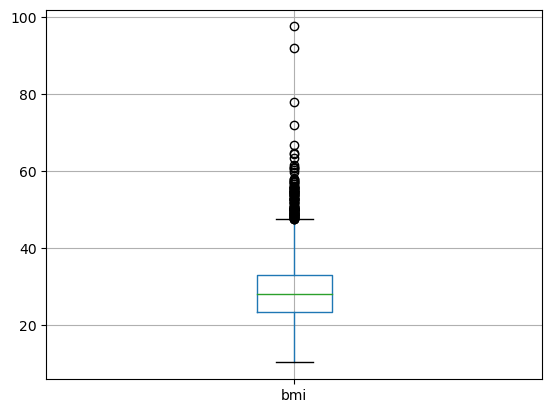

In [8]:
boxplot = df.boxplot(column=['bmi'])

#### Checking further the distribution of the datapoints, to confirm the existence the existence of outliers. The histogram below shows the datapoints is not normal.

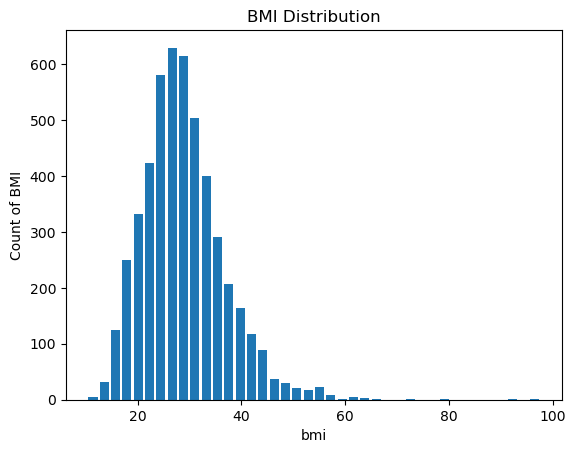

In [7]:
plt.hist(df['bmi'], bins=40, rwidth=0.8)
plt.xlabel('bmi')
plt.ylabel('Count of BMI')
plt.title ('BMI Distribution' )
plt.show()

### Exploring the data.
#### Checking the columns for uniques values. 
#### The data shows columns gender, ever_married,work_type,Residence_type,smoking_status are the only nominal categorical features. 
#### While, hypertension, heart_disease,stroke are the only discrete binary norminal values (i.e 0's and 1's),

In [8]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [16]:
print("Categories in 'gender' variable:     ", end= "  ")
print(df['gender'].unique())

print("Categories in 'ever_married' variable:     ", end= "  ")
print(df['ever_married'].unique())

print("Categories in 'work_type' variable:     ", end= "  ")
print(df['work_type'].unique())

print("Categories in 'Residence_type' variable:     ", end= "  ")
print(df['Residence_type'].unique())

print("Categories in 'smoking_status' variable:     ", end= "  ")
print(df['smoking_status'].unique())

Categories in 'gender' variable:       ['Male' 'Female' 'Other']
Categories in 'ever_married' variable:       ['Yes' 'No']
Categories in 'work_type' variable:       ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Categories in 'Residence_type' variable:       ['Urban' 'Rural']
Categories in 'smoking_status' variable:       ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [45]:
numerical_features = [ feature for feature in (df.drop(['stroke','id'], axis=1)).columns if df[feature].dtype != 'object']
categorical_features = [ feature for feature in df.columns if df[feature].dtype == 'object']




In [43]:
for col in categorical_features:
  print(df[col].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


#### It was observed in the data that;
#### 1. There are more female gender of 2994 in number. This represents 58.6% of the dataset .
#### 2. Male gender is 2115, which also represent 41.4% of the entire dataset.
#### 3. There is an observed 1 data whose gender is categorised has 'other'. 

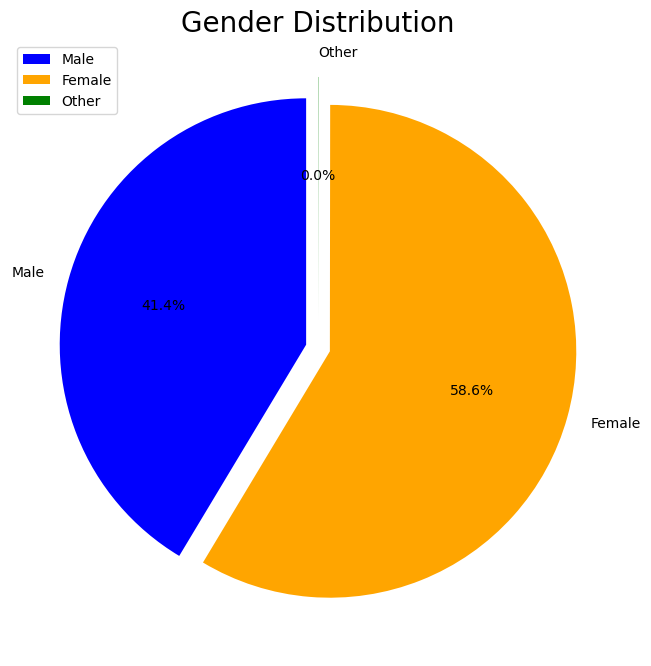

The total Count of 'Male', 'Female', 'Other' gender variable respectively are   [2115, 2994, 1]


In [24]:
lstGender = []
lstGender_Count = []

for i in df['gender'].unique():
  lstGender.append(i)
  lstGender_Count.append(len(df.loc[df['gender'] == i]))

explodeList = [0.05,0.05,0.1]
plt.figure(figsize=(8, 8))
plt.pie(lstGender_Count, labels=lstGender,autopct='%1.1f%%', startangle=90,explode=explodeList,colors=['blue','orange','green'])
plt.title('Gender Distribution', fontsize=20)
plt.legend(loc=2)
plt.show()
print ("The total Count of 'Male', 'Female', 'Other' gender variable respectively are ", end= "  ")
print (lstGender_Count)

#### There is slight correlation between age and bmi of patients in the sample dataset.
#### The  scatter plot below shows a slight upward increase of the bmi as the age increases

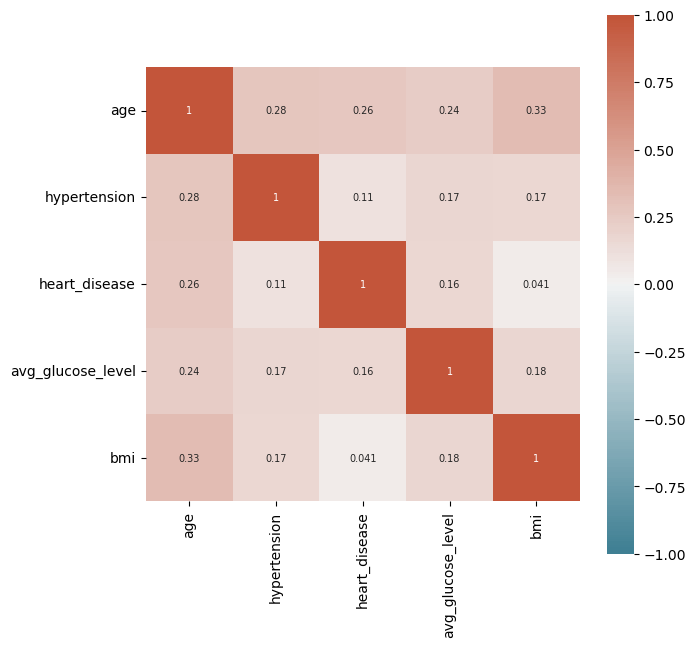

In [47]:
plt.figure(figsize=(7, 7))
corr = df[numerical_features].corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 7})
plt.show()

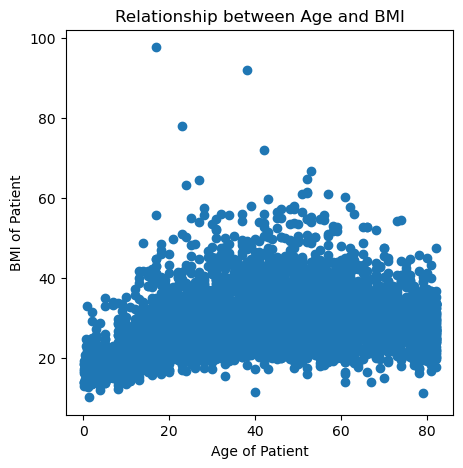

In [54]:
# the plot below show a slight upward of BMI as the age increases
plt.figure(figsize=(5, 5))
plt.scatter(df['age'],df['bmi'])
plt.xlabel('Age of Patient')
plt.ylabel('BMI of Patient')
plt.title('Relationship between Age and BMI')
plt.show()

In [55]:
df.sort_values(by='age', ascending = True)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3618,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
4021,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
3968,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4590,19271,Female,82.00,1,1,Yes,Self-employed,Urban,101.56,31.5,never smoked,0
4094,25510,Male,82.00,0,0,Yes,Self-employed,Urban,111.81,19.8,formerly smoked,0
2341,10649,Female,82.00,0,0,Yes,Private,Urban,80.00,33.6,never smoked,0
4716,5387,Female,82.00,0,0,No,Private,Rural,96.98,21.5,never smoked,0


#### It was also observed that are 20 babies(i.e children with age < 1) in the data.
#### Though, it was not recorded that any of the babies has stroke.

In [64]:
dt_stroke =  df['stroke']==1
dt_child =  df['age'] < 1
df[(dt_stroke) & (dt_child)]
print("Total Stroke Condition is :, {name}. Total Numbers of babies with the condition is {age}.".format(name=len(df.loc[df.stroke == 1]), age=len(df[(dt_stroke) & (dt_child)])))

Total Stroke Condition is :, 249. Total Numbers of babies with the condition is 0.


In [68]:
#age grouping
#0 - 17, 'Children'
#18 - 30, 'Adult'
#31 - 50, 'Young Adult'
#51 - 65, 'Old'
#66 - 85  'Elders'
dataset_stroke = df[df['stroke']==1]
lower_age_bound = [0,18,31,51,66]
upper_age_bound = [17,30,50,65,85]
#age_group = ['Children','Adult','Young Adult','Old','Elders']
age_group = ['0 - 17','18 - 30','31 - 50','51 - 65','66 - 85']
dataset_stroke['age_group'] = np.nan;
for l,u,ag in zip(lower_age_bound,upper_age_bound,age_group):
  dataset_stroke.loc[((dataset_stroke.age >= l) & (dataset_stroke.age < (u+1))) , 'age_group'] = ag
dataset_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,66 - 85
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,51 - 65
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,66 - 85
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,31 - 50
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,66 - 85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1,51 - 65
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1,0 - 17
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1,66 - 85
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1,66 - 85


In [69]:
# check to confirm if all samples has an age group value
dataset_stroke[dataset_stroke['age_group'].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group


#### It is also observed that there more female gender with than male gender
#### And more female with hypertension than male gender
#### Lastly, more male with heart disease than female

In [82]:
dataset_stroke.groupby('gender').sum()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,,
Female,5184451,9466.32,39,19,17542.43,3626.2,141
Male,4057201,7398.00,27,28,15461.21,2742.3,108


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


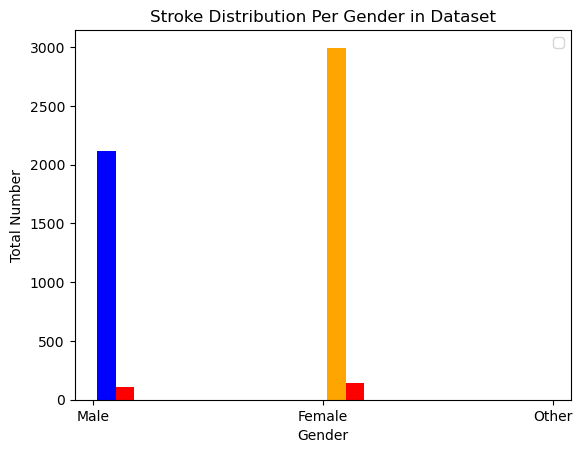

In [72]:

plt.hist([df['gender'],dataset_stroke['gender']],color= [['blue','orange','black'],['red','red','red']])
#plt.hist(d_set_stroke['gender'],color= 'red' )
plt.legend(loc='upper right')
plt.title('Stroke Distribution Per Gender in Dataset')
plt.xlabel('Gender')
plt.ylabel('Total Number')
plt.show()

green
blue
red
grey
orange


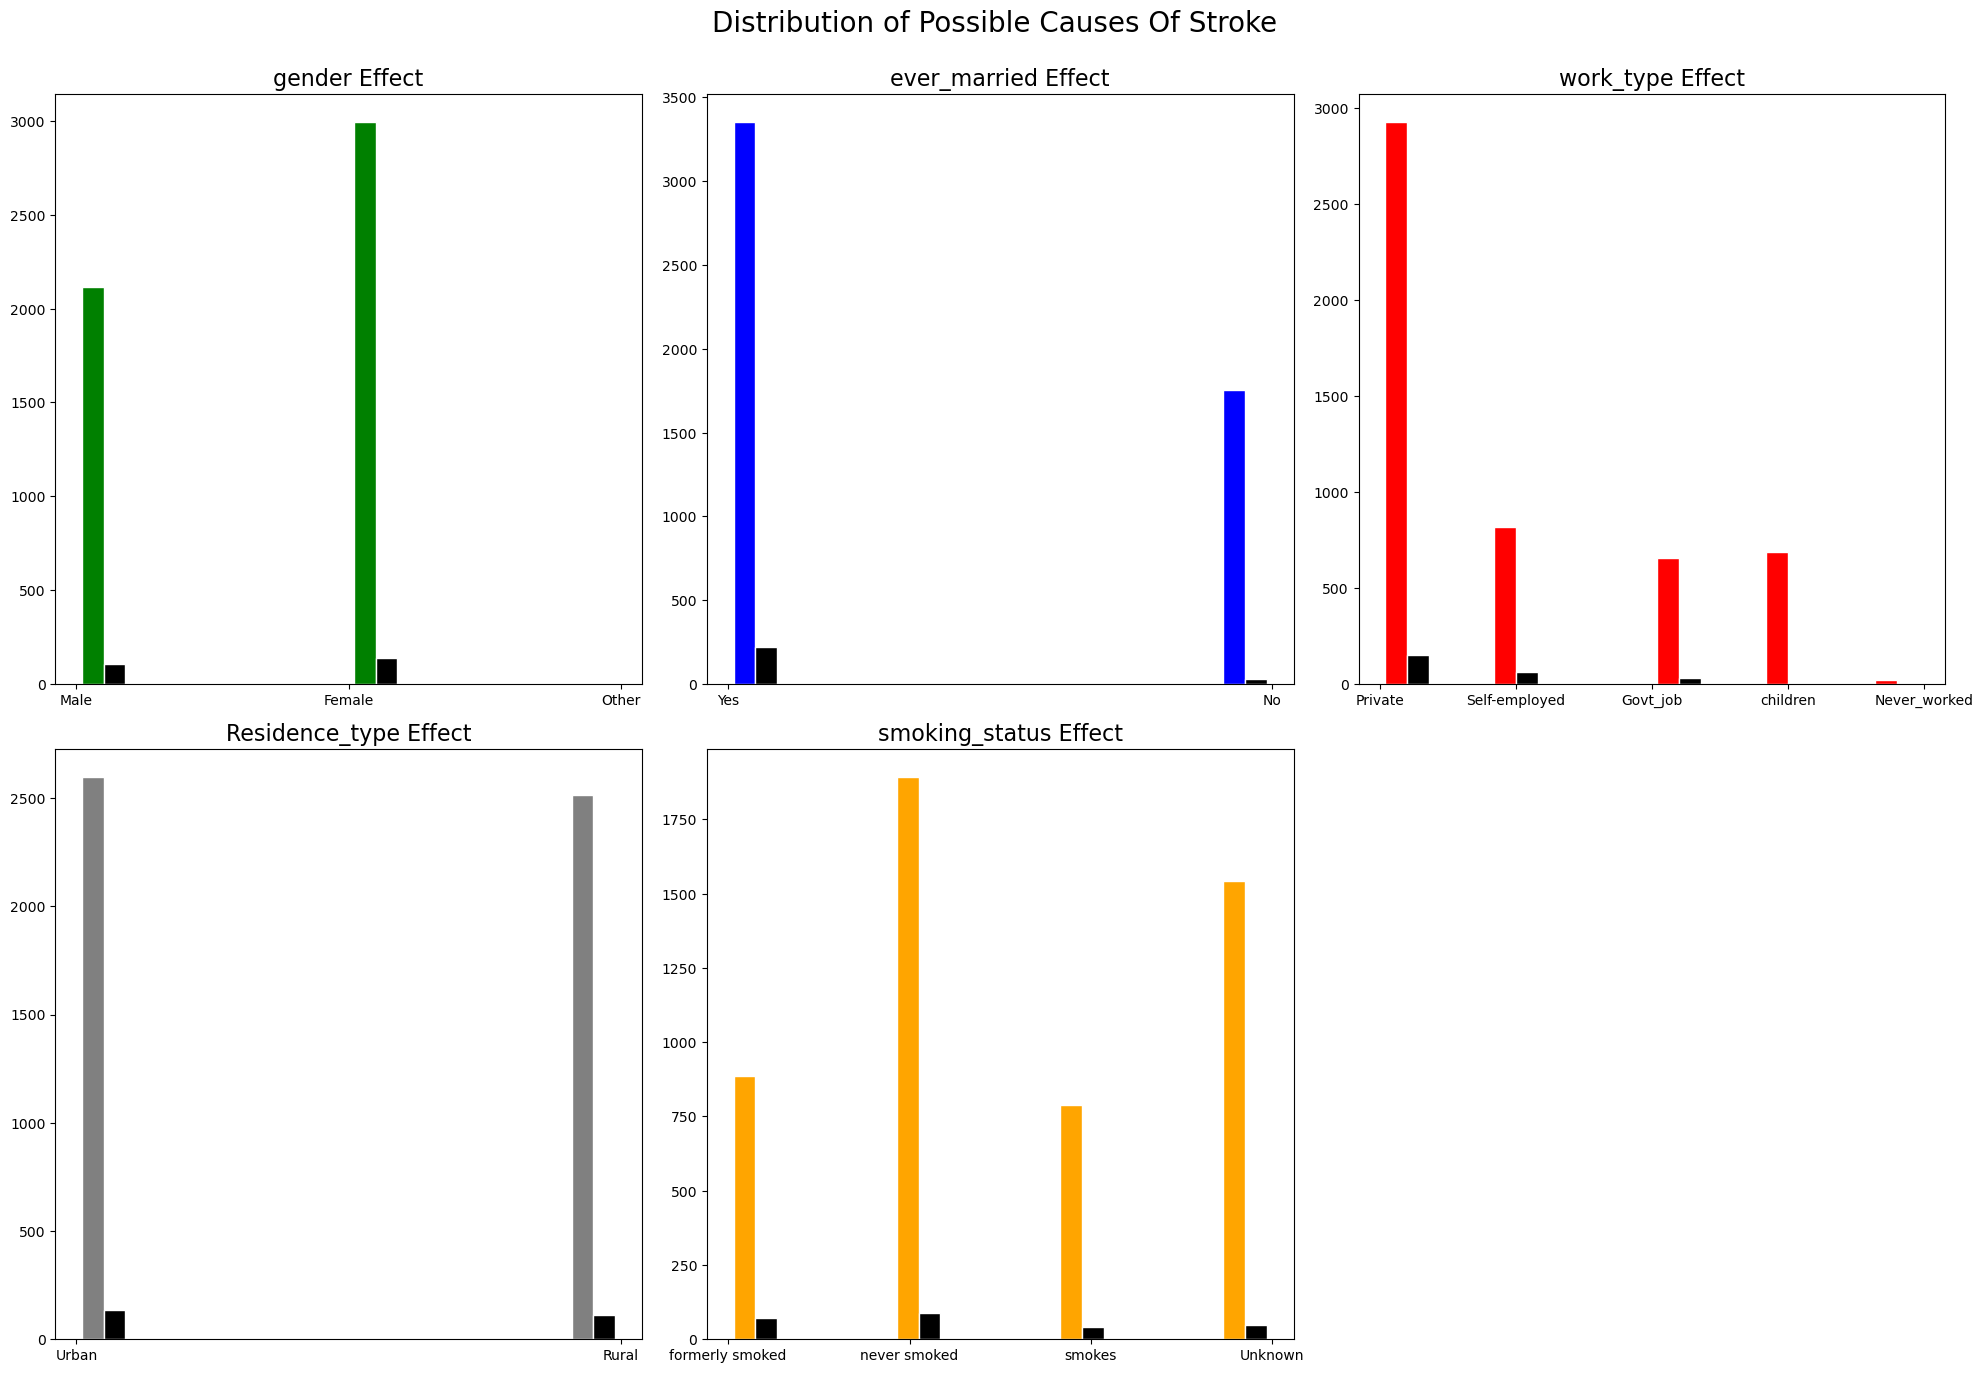

In [83]:
# Stroke condition is very prominent among the married class
# Also, majority of those affacted by the condition live in the urban area
# People working in the private sector have the condition more, then follow by the self employed.
# Smoking has least effect to the condition, because majority of those with the condition has never smoked
# The condition is very high among the elderly people between the age of 65 - 85
counter = 1
colors_ = ['green','blue','red','grey','orange','black']
fig = plt.figure(figsize=(20, 20))

bins = np.linspace(-1, 1, 3)

fig.suptitle('Distribution of Possible Causes Of Stroke', fontsize=20, position=(0.5, 1.0))
for i, name_i in enumerate(categorical_features):
    sub = fig.add_subplot(3, 3, counter)

    sub.set_title(categorical_features[i] + ' Effect', fontsize=16)
    #sub.hist(dataset[name_i],color= colors_[i], edgecolor='purple')
    #sub.hist(dataset_stroke[name_i],color= ['black'], edgecolor='white')
    sub.hist([df[name_i],dataset_stroke[name_i]],color= [colors_[i],'black'], edgecolor= 'white')
    print(colors_[i])
    counter += 1
    if i==6:
      break
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()

plt.show()